<a href="https://colab.research.google.com/github/Nasthl/macnine-learning-/blob/main/%5BCOLAB%5D_Copy_of_puste_Rekurencyjne_sieci_neuronowe_Zadania.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Zadanie związane z prognozowaniem szeregu czasowego "Airline Passengers"

Przygotuj następujace kroki:
* Wczytanie i preprocess danych:

W pierwszym kroku należy wczytać dane szeregu czasowego oraz dokonać preprocess danych, w tym normalizacji wartości szeregu czasowego, podziału na zestawy treningowe i testowe oraz zmniejszenia wymiarowości szeregu czasowego, jeśli jest to wymagane.

* Wykorzystaj bibliotekę Keras do implementacji modelu sieci rekurencyjnej.
* Przygotuj dane treningowe i testowe przez podział szeregu czasowego na segmenty o stałej długości
* Wybierz optymalne parametry modelu, takie jak liczba filtrów, wielkość okna konwolucyjnego, liczba warstw itp.
* Przetestuj metrykę oceny jakości modelu, takie jak błąd średniokwadratowy (MSE), błąd średni absolutny (MAE).
* Zwizualizuj wyniki predykcji na wykresie, aby porównać prognozy z rzeczywistymi danymi.



In [ ]:
# importowanie potrzebnych bibliotek
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from keras.optimizers import Adam

# wczytanie danych
df = pd.read_csv('https://raw.githubusercontent.com/marcin119a/PUMP2/main/flights.csv')


# Przygotowanie danych
passengers = df['passengers'].to_numpy()
passengers = np.array(passengers).reshape(-1, 1)


* Wykorzystaj bibliotekę Keras do implementacji modelu sieci rekurencyjnej.
* Przygotuj dane treningowe i testowe przez podział szeregu czasowego na segmenty o stałej długości

In [ ]:
df.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [ ]:
df.tail()

,year,month,passengers
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390
143,1960,December,432


* Wybierz optymalne parametry modelu, takie jak liczba filtrów, wielkość okna konwolucyjnego, liczba warstw itp.
* Przetestuj metrykę oceny jakości modelu, takie jak błąd średniokwadratowy (MSE), błąd średni absolutny (MAE).
* Zwizualizuj wyniki predykcji na wykresie, aby porównać prognozy z rzeczywistymi danymi.

In [ ]:
X = passengers[:-1]
y = passengers[1:]

In [ ]:
X

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [ ]:
y.shape

(143, 1)

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


# Normalizacja danych
scaler = MinMaxScaler()
X = scaler.fit_transform(passengers[:-1])
y = scaler.fit_transform(passengers[1:])


# Podział na zbiór treningowy i testowy
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
y_test_2=y_test

# model + compilacja + predykcja

In [ ]:
X_train


array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [ ]:
from tensorflow.keras.layers import Embedding

model = Sequential()
model.add(LSTM(units=128,activation='relu', input_shape=(X_train.shape[1], 1)))
#model.add(Dropout(0.4))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse', metrics=['mse'])

model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)


Epoch 1/100
4/4 [==============================] - 2s 7ms/step - loss: 0.1027 - mse: 0.1027
Epoch 2/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0955 - mse: 0.0955
Epoch 3/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0895 - mse: 0.0895
Epoch 4/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0830 - mse: 0.0830
Epoch 5/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0777 - mse: 0.0777
Epoch 6/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0722 - mse: 0.0722
Epoch 7/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0677 - mse: 0.0677
Epoch 8/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0627 - mse: 0.0627
Epoch 9/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0581 - mse: 0.0581
Epoch 10/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0538 - mse: 0.0538
Epoch 11/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0497 

In [ ]:
y_pred = model.predict(X_test)
y_test=y_test_2
# Odwrotna normalizacja danych
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

# Obliczenie błędu średniokwadratowego (MSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")

1/1 [==============================] - 0s 137ms/step
MSE: 2917.9909463531885


Text(0.5, 1.0, 'prognoza pasażerów na zbiorze testowym')

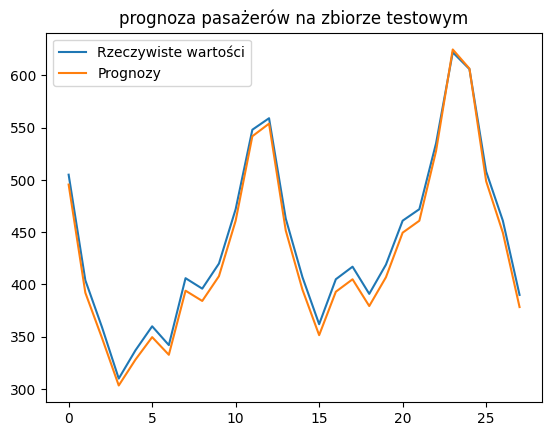

In [ ]:

# wizualizacja wyników predykcji
plt.plot(y_test[:-1], label='Rzeczywiste wartości')
plt.plot(y_pred[1:], label='Prognozy')
plt.legend()
plt.title('prognoza pasażerów na zbiorze testowym')

# Zadania związane z sieciami neuronowymi i zbiorem danych tekstowych:

Zadanie: Klasyfikacja sentymentu recenzji filmowych

### Przygotowanie danych:

Wybierz zbiór danych tekstowych - recenzji filmowych, zawierający teksty i odpowiadające im etykiety sentymentalne (np. pozytywny/negatywny).
Załaduj zbiór danych i podziel go na zbiór treningowy i zbiór testowy.

### Implementacja modelu:

Stwórz model sieci neuronowej w Keras, np. oparty na warstwach Embedding i Dense.
Dodaj warstwę Embedding, aby przekształcić słowa na wektory o stałej długości.
Dodaj warstwy ukryte, takie jak warstwy LSTM, Conv1D lub Dense, aby przetwarzać wektory.
Dodaj warstwę wyjściową, która generuje wynik klasyfikacji (np. softmax dla wieloklasowej klasyfikacji sentymentu).
### Trenowanie modelu:

Skompiluj model, określając funkcję kosztu i optymalizator.
Trenuj model na danych treningowych za pomocą funkcji fit(), określając liczbę epok, rozmiar partii (batch size) i opcjonalnie zbiór walidacyjny.
### Ocena modelu:

Ocena wydajności modelu na danych testowych za pomocą funkcji evaluate(), która oblicza stratę (koszt) i metryki, takie jak dokładność (accuracy).
Wykorzystaj wyniki oceny do analizy wydajności modelu.
### Predykcja:

Wykorzystaj nauczony model do predykcji sentymentu na nowych danych tekstowych.
Przekształć teksty na wektory lub sekwencje liczb za pomocą tokenizacji i kodowania tekstów.
To zadanie polega na zastosowaniu sieci neuronowej do klasyfikacji sentymentu recenzji filmowych na pozytywne i negatywne. Możesz dostosować architekturę modelu, rodzaj warstw, parametry uczenia i inne aspekty w celu zoptymalizowania wyników.

Pamiętaj, że powyższe wskazówki stanowią ogólny szkic zadania, a dostosowanie go do konkretnego zbioru danych i wymagań modelu jest niezbędne.

In [ ]:
from keras.datasets import imdb, reuters
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

# Przygotowanie danych
max_features = 1000
max_len = 200
num_classes = 2

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)


from keras.utils import to_categorical

# Przygotowanie etykiet w postaci one-hot
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

In [ ]:
y_train

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [ ]:
#todo model + predykcja

model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=2, batch_size=32, verbose=1, validation_split=0.2)

#y_pred = model.predict(X_test)

Epoch 1/2
625/625 [==============================] - 305s 402ms/step - loss: 0.4784 - accuracy: 0.7705 - val_loss: 0.4209 - val_accuracy: 0.8224
Epoch 2/2
625/625 [==============================] - 250s 400ms/step - loss: 0.3997 - accuracy: 0.8272 - val_loss: 0.3725 - val_accuracy: 0.8430


### Sprawdzenie: danych IMDB

In [ ]:
from keras.datasets import imdb
from keras.preprocessing import sequence

# Przygotowanie danych
max_features = 10000
max_len = 200

word_index = imdb.get_word_index()

# Odwrócenie mapowania indeksów słów na słowa
reverse_word_index = dict((index, word) for (word, index) in word_index.items())

# Dekodowanie recenzji tekstowych
def decode_review(index_list):
    return ' '.join(reverse_word_index.get(index - 3, '?') for index in index_list)

# Wyświetlanie przykładowych recenzji
for i in range(5):
    review = decode_review(X_test[i])
    import numpy as np

    # Przyjmujemy, że 'model' to wcześniej wytrenowany model.

    # Wykonujemy predykcję na zestawie testowym.
    predictions = model.predict(X_test[i:(i+1), :])

    # Wyodrębniamy logity z wyników predykcji.
    logits = predictions

    # Przywracamy one-hot encoding.
    one_hot_predictions = np.argmax(logits, axis=1)

    print("Predictions (One-hot encoding):", one_hot_predictions)

    print(f"Recenzja {i+1}: {y_test[i]}")
    print(review)
    print()

1/1 [==============================] - 0s 266ms/step
Predictions (One-hot encoding): [0]
Recenzja 1: [1. 0.]
? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? please give this one a miss br br ? ? and the rest of the cast ? terrible performances the show is ? ? ? br br i don't know how michael ? could have ? this one on his ? he almost seemed to know this wasn't going to work out and his performance was quite ? so all you ? fans give this a miss

1/1 [==============================] - 0s 65ms/step
Predictions (One-hot encoding): [1]
Recenzja 2: [0. 1.]
? ? it's very interesting that robert ? directed this ? the style and ? of his other films still the ? ? ? style is ? here and there i think what really makes this film work is the brilliant performance by ? ? it's definitely

In [ ]:
imdb.get_word_index()['year']

288

W powyższym kodzie wykorzystano zbiór danych IMDB, który jest wbudowanym zbiorem danych tekstowych w Keras. Dane są przetwarzane i tokenizowane przy użyciu funkcji imdb.load_data() i sequence.pad_sequences(), aby utworzyć macierze sekwencji o stałej długości.

* Następnie model sieci neuronowej jest zdefiniowany przy użyciu warstw Embedding (do mapowania słów na wektory) oraz LSTM (do analizy sekwencji). Warstwa wyjściowa ma funkcję aktywacji softmax, ponieważ jest to zadanie binarnej klasyfikacji sentymentu.

* Model jest kompilowany z użyciem funkcji straty categorical_crossentropy (ze względu na zadanie binarnej klasyfikacji) i optymalizatorem adam.

* Następnie model jest trenowany na danych treningowych za pomocą funkcji fit(), a następnie oceniany na danych testowych za pomocą funkcji evaluate(). Wyniki straty (kosztu) i dokładności (accuracy) są wyświetlane na ekranie.

* Pamiętaj, że powyższy kod jest ogólnym przykładem i może wymagać dostosowania do konkretnego zbioru danych i wymagań modelu.






### Zadanie
**Zadanie: Przewidywanie Etykiet Ze Zbioru Reuters**

Twoim zadaniem jest zbudowanie modelu klasyfikacji tekstu, który będzie przewidywał etykiety tematów dla dokumentów ze zbioru Reuters. Zbiór Reuters jest popularnym zbiorem danych do zadania klasyfikacji wieloklasowej, gdzie każdy dokument jest przypisany do jednej lub kilku etykiet tematów.

**Opis Zadania**

Twoim celem jest zbudowanie modelu klasyfikacji, który nauczy się na podstawie opisów dokumentów z zestawu Reuters i przewidzi, do jakich etykiet tematów każdy dokument należy. W tym przypadku, zadanie klasyfikacji jest problemem wieloklasowym, ponieważ każdy dokument może być przypisany do jednej lub wielu etykiet tematów.

**Instrukcje**

1. Zaimportuj odpowiednie moduły z biblioteki Keras i przygotuj dane ze zbioru Reuters.

2. Zdefiniuj architekturę modelu klasyfikacji. Możesz użyć różnych warstw, takich jak Embedding, LSTM, Dense itp., aby zbudować model.

3. Podziel dane na zbiór treningowy i zbiór testowy w celu oceny jakości modelu.

4. Skonfiguruj model, wybierz odpowiedni optymalizator i funkcję straty.

5. Trenuj model na danych treningowych.

6. Oceń wyniki treningu i przetestuj działanie modelu na danych testowych.

**Wskazówki**

- Upewnij się, że odpowiednio przetworzyłeś dane tekstowe ze zbioru Reuters przed użyciem ich do treningu modelu. Możesz użyć technik tokenizacji, wektoryzacji lub kodowania one-hot.

- W zadaniu klasyfikacji wieloklasowej, odpowiednia funkcja straty to `sparse_categorical_crossentropy` lub `categorical_crossentropy`, w zależności od tego, jak zorganizowane są etykiety w danych.

- Eksperymentuj z różnymi architekturami modelu, rozmiarami warstw i hiperparametrami, aby uzyskać jak najlepszą wydajność klasyfikacji.

- Monitoruj wyniki na zbiorze walidacyjnym, aby uniknąć nadmiernego dopasowania (overfitting) modelu.

**Oczekiwany Efekt**

Oczekuje się, że po ukończeniu tego zadania będziesz mieć zaawansowany model klasyfikacji tekstu, który będzie w stanie przewidywać etykiety tematów dla dokumentów ze zbioru Reuters. Twój model powinien być zdolny do klasyfikacji nowych dokumentów z zewnętrznych źródeł na podstawie nauczonej wiedzy.

In [ ]:
from keras.datasets import reuters
from keras.preprocessing import sequence

# Przygotowanie danych
max_features = 10000
max_len = 200

word_index = reuters.get_word_index()

# Odwrócenie mapowania indeksów słów na słowa
reverse_word_index = dict((index, word) for (word, index) in word_index.items())

550378/550378 [==============================] - 1s 1us/step


In [ ]:
from keras.utils import pad_sequences
from keras.utils import to_categorical


max_len = 200
num_classes = 46

(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=max_features)
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

2110848/2110848 [==============================] - 1s 0us/step


In [ ]:
y_train.min()


0


2. Zdefiniuj architekturę modelu klasyfikacji. Możesz użyć różnych warstw, takich jak Embedding, LSTM, Dense itp., aby zbudować model.


In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Conv1D, GlobalMaxPooling1D, Dropout

model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=512))
model.add(Conv1D(filters=1024, kernel_size=5))
#model.add(GlobalMaxPooling1D())
model.add(LSTM(512,dropout=0.25, recurrent_dropout=0.25))
#model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dense(2048, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100, batch_size=1024, verbose=1, validation_split=0.2)

Epoch 1/100



3. Podziel dane na zbiór treningowy i zbiór testowy w celu oceny jakości modelu.



In [ ]:
model.evaluate(X_test,y_test)


71/71 [==============================] - 5s 74ms/step - loss: 1.4992 - accuracy: 0.6941


[1.499165654182434, 0.6941229104995728]

4. Skonfiguruj model, wybierz odpowiedni optymalizator i funkcję straty.



AttributeError: 'dict' object has no attribute 'size'

5. Trenuj model na danych treningowych.



6. Oceń wyniki treningu i przetestuj działanie modelu na danych testowych.
